In [1]:
import numpy as np
from __future__ import division, print_function
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from scipy import spatial

#table = np.loadtxt("E:/studies/Autumn again/ISE 5243 data mining/Fuzzy C/grades.csv")
#data should not have column names
#data=table.T
#data=np.array([1,2,3,4,5,6,7,8,9])
data=np.array([[1,2,3,4,5,6,7,8,9],[3,4,5,6,7,8,9,10,11],[5,6,7,8,9,10,11,12,13]])

ImportError: No module named 'skfuzzy'

In [16]:
data[0]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
#testing 

tuple=('varun',24,'M')
list=['varun',24,'M']
dict={'name':'Varun','age':24,'sex':'M'}
tuple not in list


for i in tuple:
    if (i==24):
        pass
    else:
        print (i)

import math
print ("mabs value ", math.fabs(-25),"value")

name="Varun"
name[0:2]
sentence="""varun
      is a man"""
print(sentence)

para="varun is a man. Arjhun is a man\nasdfasdfasdf\nasdfas\nasdfasdf\nasdfasdf\nasdgasdf\nasdfwerf\nasdfasefavsd\nasdfasdffasdf"

list=[]

[i for i in map(lambda x:len(x),para.splitlines())]
    #list.append(i)
#list
    

a="5 4 3 2"
[i for i in map(int,a.split())]


varun
M
mabs value  25.0 value
varun
      is a man


[5, 4, 3, 2]

In [22]:
#euclidean distance function
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))



In [20]:
#cosine similarity
from scipy import spatial

dataSetI = [1, 1, 1, 1]
dataSetII = [1, 1, 1, 1]
result = spatial.distance.cosine(dataSetI, dataSetII)
result

0.0

In [5]:
# data= data in the form of numpy array array (transposed tabular data), c=no of clusters, m=fuzzy coefficient
# req_iter= # iterations required, tol= error tolerance
def fuzzyc(data,c,m,req_iter,tol):
    #Fuzzy coefficient
    m=m

    #Cluster centers
    c=c

    #length of the dataset
    #l=len(data)
    l=len(data[1])

    # the power for the next membership funciton calc.
    exp=2/(m-1)

    #dimensions of the data
    dim=len(data)

    #no of iterations
    req_iter=req_iter

    #minimization tolerance
    tol=tol


    #random number generation for the initial membership matrix
    e = np.random.random((c,l))
    randtot=np.sum(e, axis=0)

    #new Uik calc.
    Uik=np.divide(e,randtot)
    Uikm=(Uik)**m

    # Loop for minimization function
    iterationcnt=0
    d=(dim,c)
    njmin=1
    jmin=0
    while np.absolute(njmin-jmin)>tol and iterationcnt<req_iter:      
        #################### Iteration a ######################
        #center calc.
        nvi=np.zeros(d)
        for i in range(dim):
            nvi[i]=np.sum(np.multiply(data[i],Uikm),axis=1)/np.sum(Uikm,axis=1)

        #new membership matrix calc.
        dataT=data.T
        nviT=nvi.T
        size=(c,l)
        nUik=np.zeros(size)
        for j in range(c):
            for i in range(l):    
                xk_vi_dist=dist(dataT[i],nviT[j])
                denom=0
                for r in range(c):
                        xk_vr_dist=dist(dataT[i],nviT[r])
                        ratio=(xk_vi_dist/xk_vr_dist)**exp
                        denom=denom+ratio
        #new Uik is calc. here           
                nUik[j,i]=1/denom

        #new Uikm is calc. here        
        nUikm=(nUik)**m

        #minimization function calc.
        njm=np.zeros(size)
        for j in range(c):
            for i in range(len(data)):    
                njm[j,i]=(dist(dataT[i],nviT[j]))**2

        njmin=np.sum(np.multiply(njm,nUikm))

        #################### Iteration b ######################
        #center calc.
        vi=np.zeros(d)
        for i in range(dim):
            vi[i]=np.sum(np.multiply(data[i],nUikm),axis=1)/np.sum(nUikm,axis=1)

        #new membership matrix calc.
        dataT=data.T
        viT=vi.T
        size=(c,l)
        Uik=np.zeros(size)
        for j in range(c):
            for i in range(l):    
                xk_vi_dist=dist(dataT[i],viT[j])
                denom=0
                for r in range(c):
                        xk_vr_dist=dist(dataT[i],viT[r])
                        ratio=(xk_vi_dist/xk_vr_dist)**exp
                        denom=denom+ratio
        #new Uik is calc. here           
                Uik[j,i]=1/denom

        #new Uikm is calc. here        
        Uikm=(Uik)**m

        #minimization function calc.
        jm=np.zeros(size)
        for j in range(c):
            for i in range(len(data)):    
                jm[j,i]=(dist(dataT[i],viT[j]))**2

        jmin=np.sum(np.multiply(jm,Uikm))
        iterationcnt=iterationcnt+1
    ####################################################################################################

    #this will have the final centers
    newcenters=viT

    #This will have the allocation of datapoints to centers
    allocation=np.argmax(Uik.T,axis=1)
    
    #This will have SSE
    SSE=0
    for i in range(l):
        SSE=SSE+dist(newcenters[allocation[i]],data.T[i])
    
    #This will have SST
    SST=0
    for i in range(l):
        SST=SST+dist(data.T[i],np.mean(newcenters,0))
        
    #This will have the membership matix U
    mem_mat=Uik.T
    
    #FPC : varies from (1/c to 1)
    fpc=np.sum(Uik**2)/l

    #FuPC (normalized to 0 to 1)
    fpc_norm=(np.sum(Uik**2)/l-(1/c))/(1-(1/c))
    
    
    print("The vectors below in the order are")
    print("Allocation,centers,SSE,SST,mem_mat")
    return allocation+1,newcenters,SSE,SST,mem_mat,fpc,fpc_norm
    

In [6]:
# additionally, nclus= no of clusters from 2 to n for which fuzzy partition coefficent has to be calc.

def fuzzyc_fpc(data,m,req_iter,tol,n_clus):

    n_clus=n_clus
    c=np.zeros(n_clus)
    d=np.zeros(n_clus)
    fpc=np.zeros(n_clus)
    fpc_norm=np.zeros(n_clus)
    i=0

    for i in range(n_clus):
        j=i+2
        a,b,c[i],d[i],e,fpc[i],fpc_norm[i]=fuzzyc(data,j,m,req_iter,tol)
    l=n_clus+2
    fig2, ax2 = plt.subplots()
    ax2.plot(np.r_[2:l], fpc,marker='o',linestyle='--')
    ax2.set_xlabel("Number of centers")
    ax2.set_ylabel("Fuzzy partition coefficient")
    plt.show()

In [13]:
fuzzyc(data,6,2,20,0.0001)

The vectors below in the order are
Allocation,centers,SSE,SST,mem_mat


(array([3, 3, 5, 6, 4, 4, 1, 2, 2], dtype=int64),
 array([[  6.93864262,   8.93864262,  10.93864262],
        [  8.6576483 ,  10.6576483 ,  12.6576483 ],
        [  1.1723177 ,   3.1723177 ,   5.1723177 ],
        [  5.19495401,   7.19495401,   9.19495401],
        [  2.83857623,   4.83857623,   6.83857623],
        [  4.00253237,   6.00253237,   8.00253237]]),
 5.5864068674516014,
 34.986077842718203,
 array([[  8.29412986e-04,   4.98832085e-04,   9.85111558e-01,
           1.66222881e-03,   8.65330336e-03,   3.24466465e-03],
        [  1.24519099e-02,   6.85187563e-03,   4.43326649e-01,
           2.97523962e-02,   4.31882962e-01,   7.57342070e-02],
        [  1.61260733e-03,   7.81537621e-04,   7.48894037e-03,
           5.19243339e-03,   9.60034477e-01,   2.48900047e-02],
        [  7.42599050e-07,   2.95606890e-07,   8.02022793e-07,
           4.49102587e-06,   4.75408036e-06,   9.99988915e-01],
        [  9.52339730e-03,   2.67536800e-03,   2.44295603e-03,
           9.41722801e-

The vectors below in the order are
Allocation,centers,SSE,SST,mem_mat
The vectors below in the order are
Allocation,centers,SSE,SST,mem_mat
The vectors below in the order are
Allocation,centers,SSE,SST,mem_mat
The vectors below in the order are
Allocation,centers,SSE,SST,mem_mat


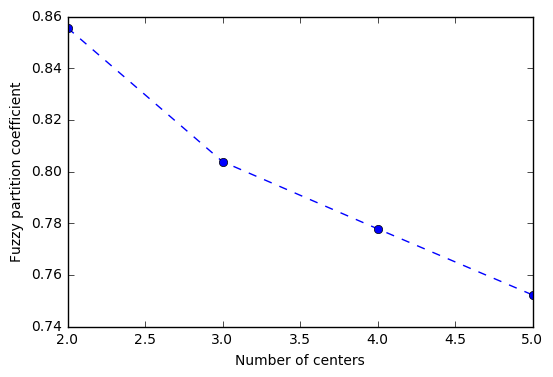

In [8]:
fuzzyc_fpc(data,2,100,0.0001,4)

In [176]:
#off the shelf implementation
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data, 2, 2, error=0.0001, maxiter=1000, init=None)
fpc

0.85560240952279321